<a href="https://colab.research.google.com/github/Metwill98/Metwill98/blob/main/EDA_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [6]:
df = pd.read_csv('1. Weather Data.csv')

**Data Overview And Cleaning**

In [7]:
# Key Characteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
# Identify and handle any missing or null values.
# Describe your approach and reasoning.
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

I have started by identifying the null values by using the following code: null_counts = df.isnull().sum()
Apparently, the dataset has no missing values which enhances a higher accuracy in my analysis.


In [9]:
#Check duplicate records
df.duplicated().sum()

0

**Statistical Summary**

In [10]:
# statistical summary for numerical features
df.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

<Axes: ylabel='Temp_C'>

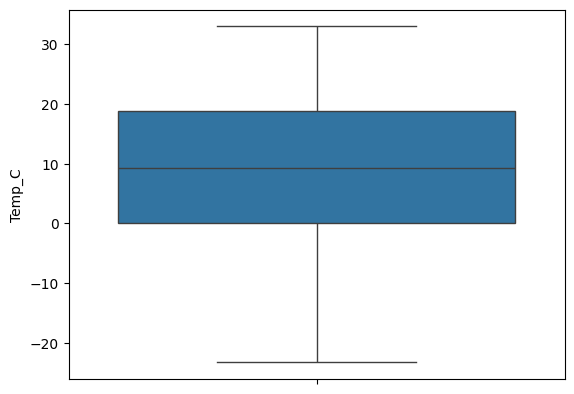

In [12]:
#  Identify Significant Outliers in the Dataset
sns.boxplot(y=df['Temp_C'])


<Axes: ylabel='Dew Point Temp_C'>

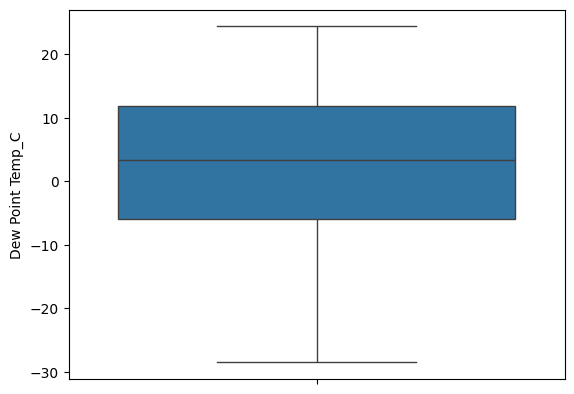

In [13]:
sns.boxplot(y=df['Dew Point Temp_C'])

<Axes: ylabel='Rel Hum_%'>

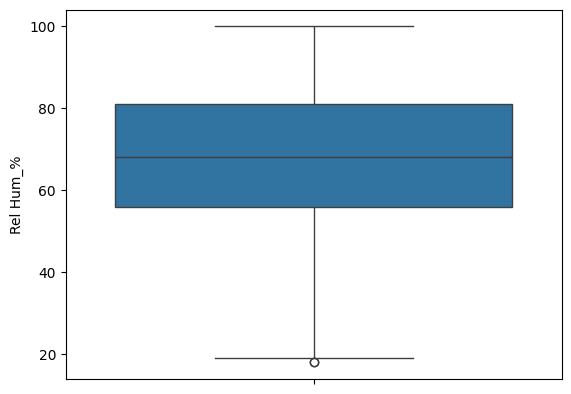

In [14]:
sns.boxplot(y=df['Rel Hum_%'])

<Axes: ylabel='Wind Speed_km/h'>

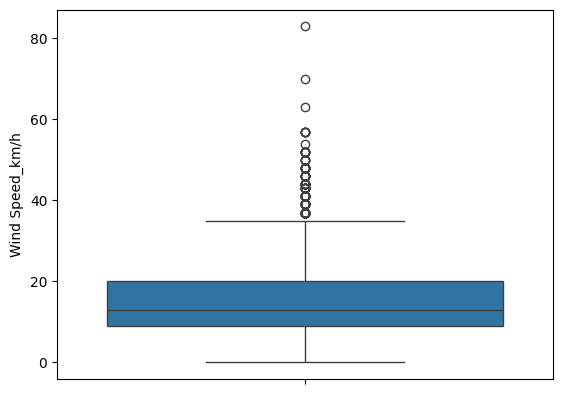

In [15]:
sns.boxplot(y=df['Wind Speed_km/h'])

<Axes: ylabel='Visibility_km'>

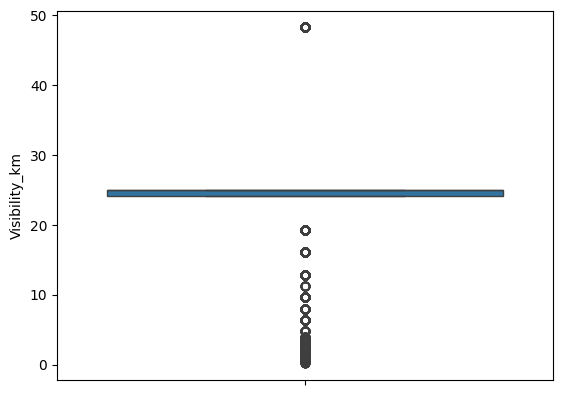

In [16]:
sns.boxplot(y=df['Visibility_km'])

<Axes: ylabel='Press_kPa'>

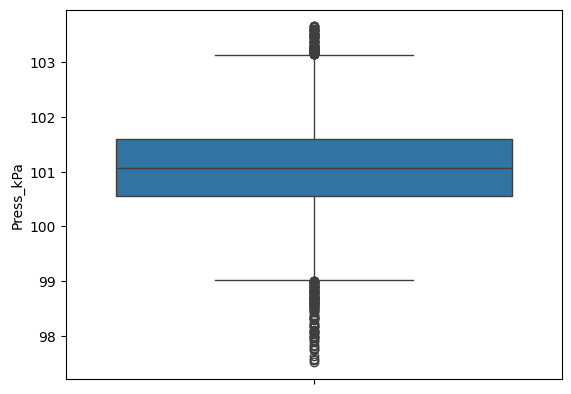

In [17]:
sns.boxplot(y=df['Press_kPa'])

There are box plots above shows whether a column has outliers or not

**Data Visualisation**

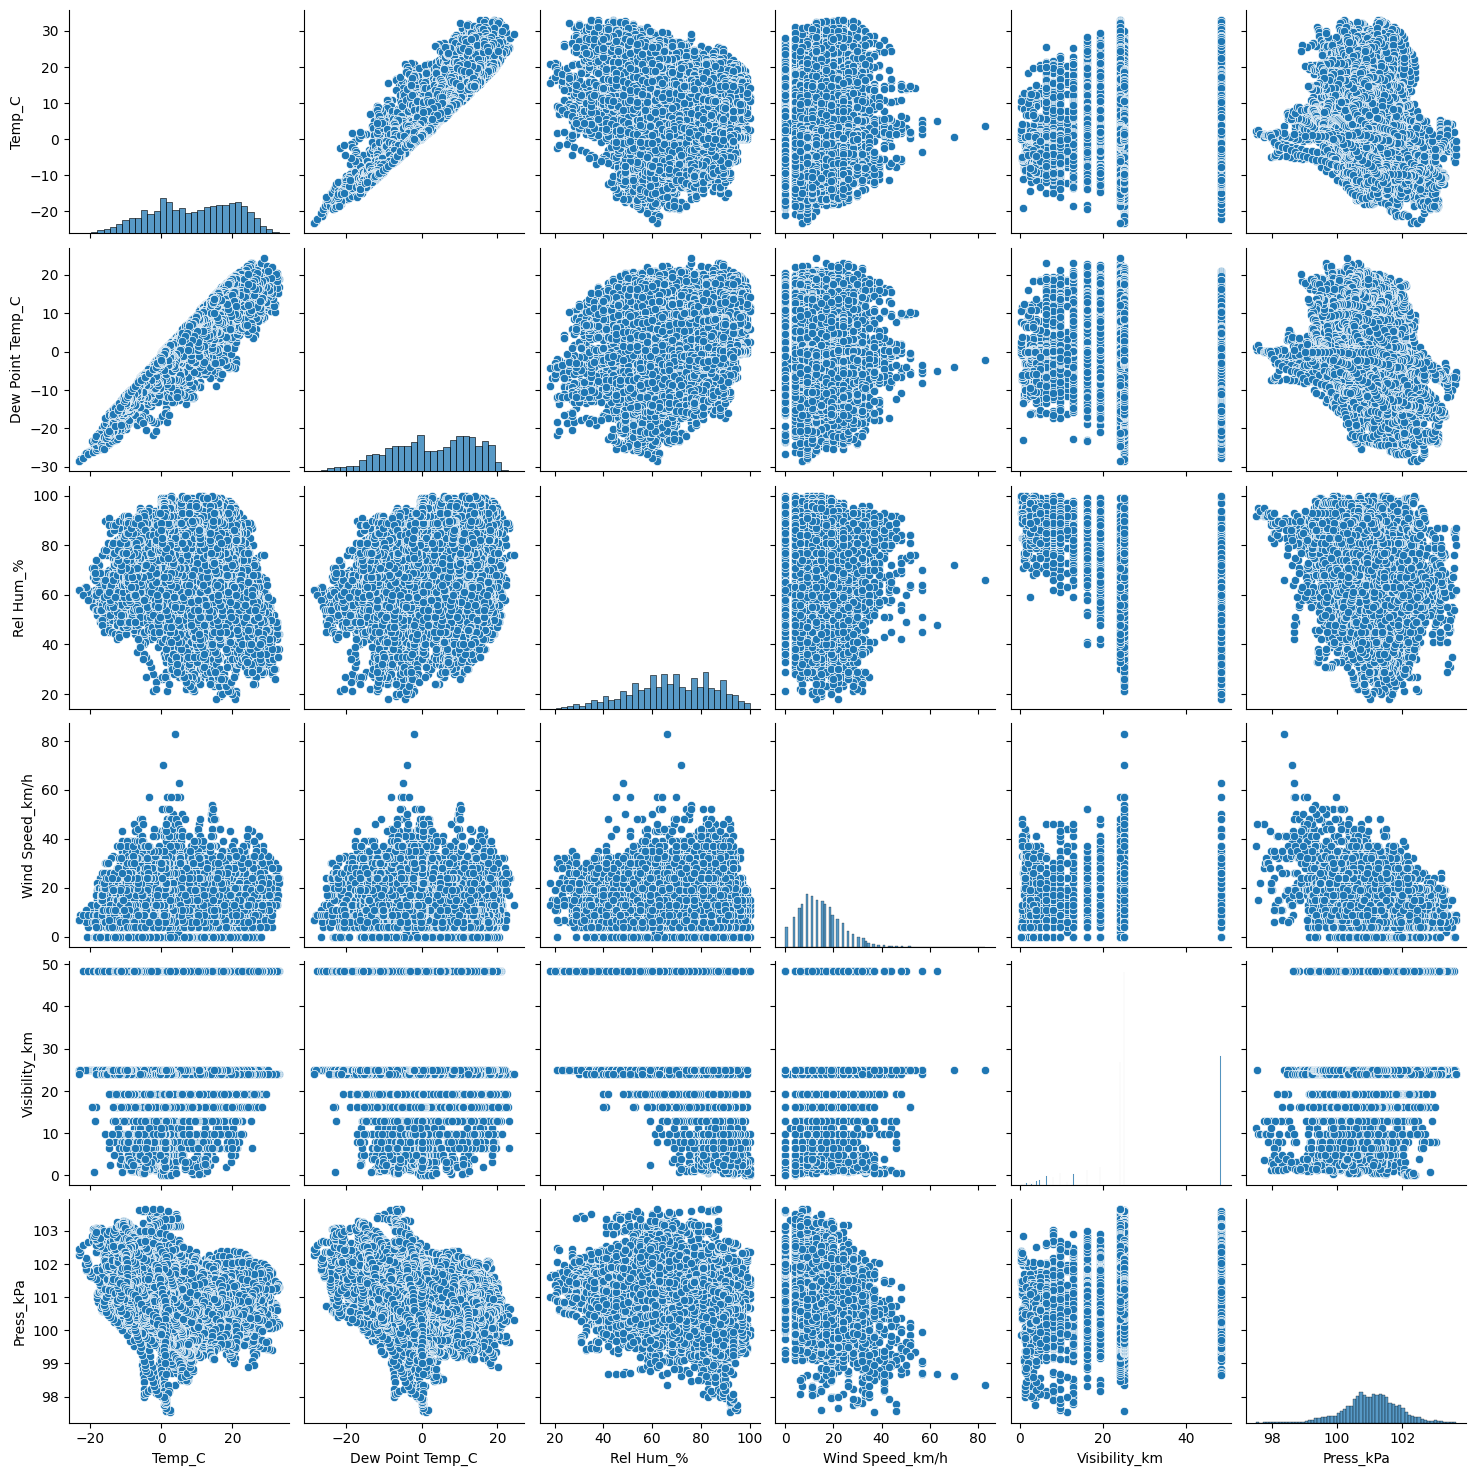

In [18]:
#Create visualizations to show the distribution of key weather parameters
#such as temperature, humidity, wind speed, etc.
sns.pairplot(df)


In [19]:
#Plot time series graphs to visualize trends over time.
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)
df.head()


Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86                4   
2012-01-01 01:00:00    -1.8              -3.7         87                4   
2012-01-01 02:00:00    -1.8              -3.4         89                7   
2012-01-01 03:00:00    -1.5              -3.2         88                6   
2012-01-01 04:00:00    -1.5              -3.3         88                7   

                     Visibility_km  Press_kPa               Weather  
Date/Time                                                            
2012-01-01 00:00:00            8.0     101.24                   Fog  
2012-01-01 01:00:00            8.0     101.24                   Fog  
2012-01-01 02:00:00            4.0     101.26  Freezing Drizzle,Fog  
2012-01-01 03:00:00            4.0     101.27  Freezing Drizzle,Fog  
2012-01-01 04:00:00            4.8     101.23                   Fog

<Axes: xlabel='Date/Time', ylabel='Temp_C'>

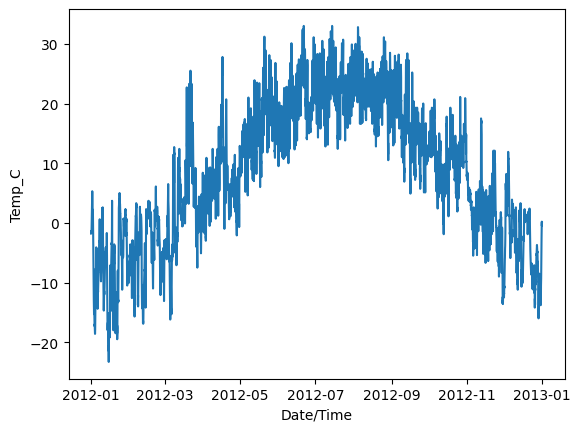

In [21]:
#Highlight any notable patterns or seasonal variations
sns.lineplot(data=df['Temp_C'])

<Axes: xlabel='Date/Time', ylabel='Dew Point Temp_C'>

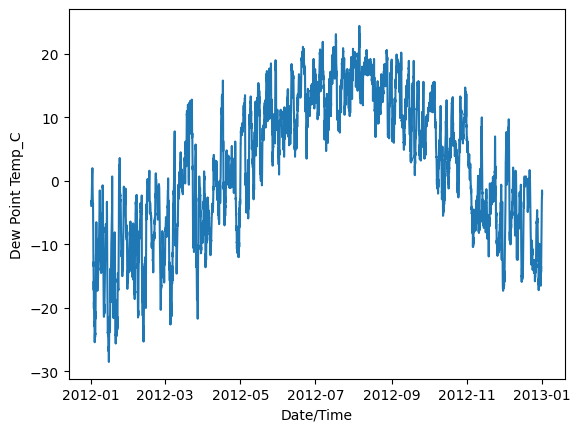

In [22]:
sns.lineplot(data=df['Dew Point Temp_C'])

<Axes: xlabel='Date/Time', ylabel='Rel Hum_%'>

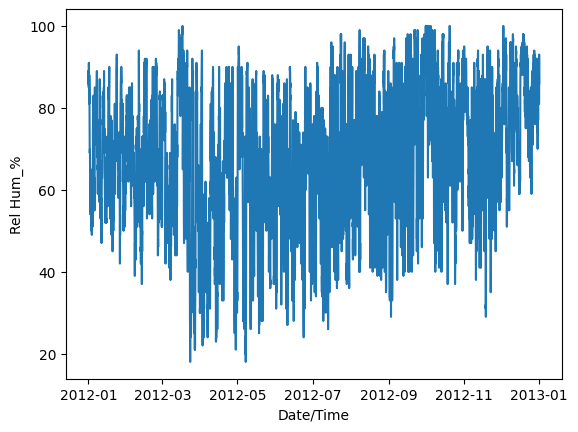

In [23]:
sns.lineplot(data=df['Rel Hum_%'])

<Axes: xlabel='Date/Time', ylabel='Wind Speed_km/h'>

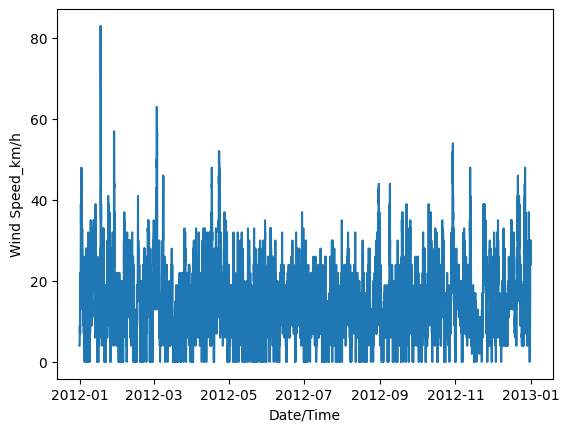

In [24]:
sns.lineplot(data=df['Wind Speed_km/h'])

In [27]:
# Create correlation matrices Example for dropping a column (replace
# 'Column_With_Fog' with the actual column name):
df = df.drop('Weather', axis=1)

# Now calculate the correlation matrix
df.corr()

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000

<Axes: >

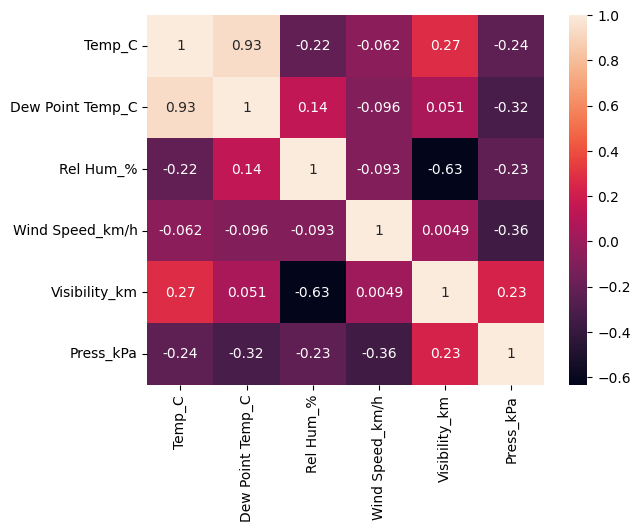

In [28]:
#create a heatmap
#to identify the relationship between different weather parameters
sns.heatmap(df.corr(), annot=True)

**Weather Patterns And Trends**

<Axes: xlabel='Date/Time', ylabel='Temp_C'>

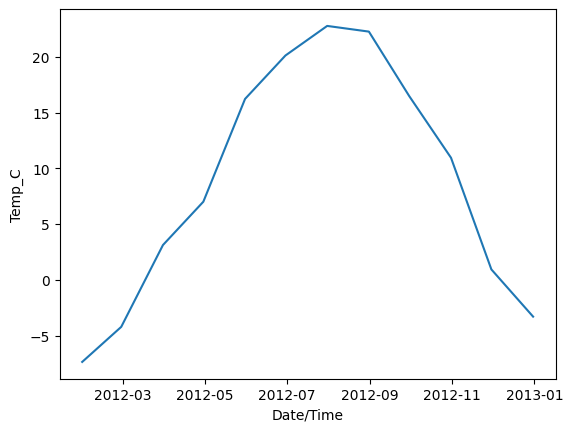

In [29]:
#Analyze and describe any trends or patterns you observe in the data. For instance,
#how do temperature and humidity vary across different seasons or months?
sns.lineplot(data=df['Temp_C'].resample('M').mean())



The temperature tends to be low during the first months of 2012. It keeps rising from month 3 to month 8, afterwards, it starts falling back from month 8 to month 1 of the year 2013. According to this graph, temperatures tend to be low when the year starts, keeps rising and the falls back when the year is going to end.

<Axes: xlabel='Date/Time', ylabel='Rel Hum_%'>

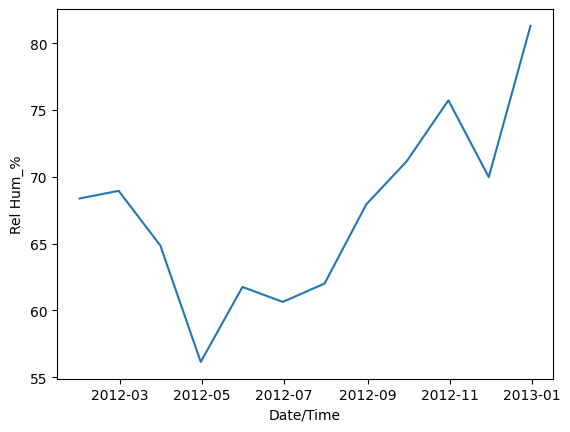

In [30]:
sns.lineplot(data=df['Rel Hum_%'].resample('M').mean())

The Relative humidity is high when the year starts but there is a gradual decrease from month 3 to month 5. Afterwards, from month 5 upto month 1 of 2013, the graph shows an overall upward trend in temperature, although with some fluctuations and occasional dips along the way.
The relative humidity is usually high from month 1, when the temperature is low. Infact, this also inicates how relative humidity is negatively correlated to temperature.

<Axes: xlabel='Dew Point Temp_C', ylabel='Temp_C'>

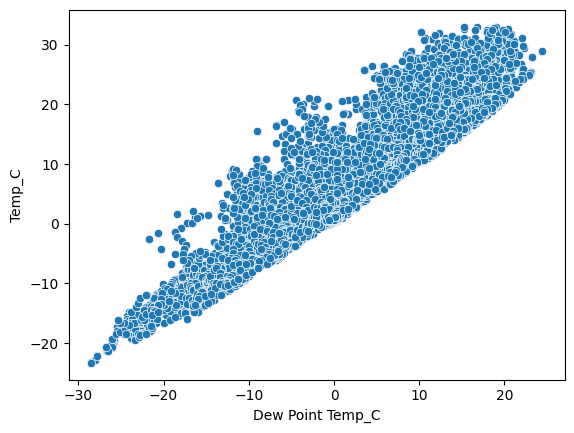

In [34]:
#Investigate any anomalies or unusual patterns in the dataset.
sns.scatterplot(y=df['Temp_C'], x=df['Dew Point Temp_C'])

<Axes: xlabel='Rel Hum_%', ylabel='Temp_C'>

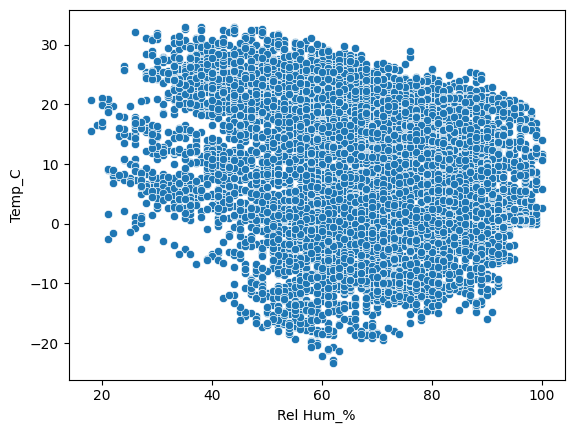

In [35]:
sns.scatterplot(y=df['Temp_C'], x=df['Rel Hum_%'])

<Axes: xlabel='Wind Speed_km/h', ylabel='Temp_C'>

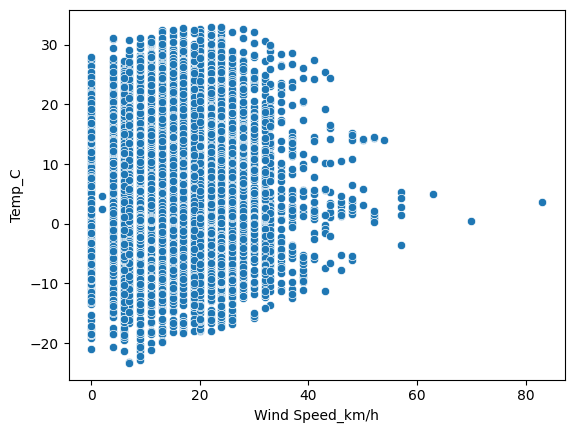

In [36]:
sns.scatterplot(y=df['Temp_C'], x=df['Wind Speed_km/h'])

<Axes: xlabel='Visibility_km', ylabel='Temp_C'>

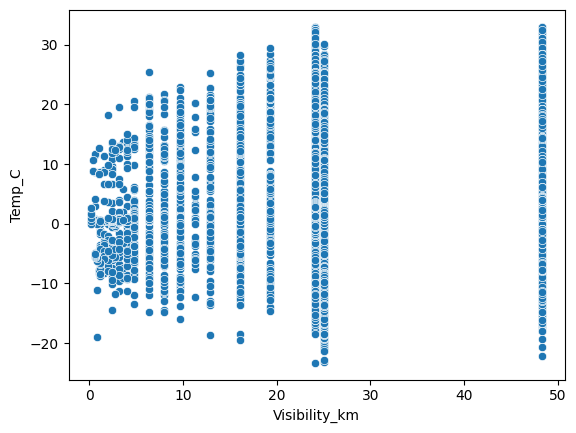

In [37]:
sns.scatterplot(y=df['Temp_C'], x=df['Visibility_km'])

<Axes: xlabel='Press_kPa', ylabel='Temp_C'>

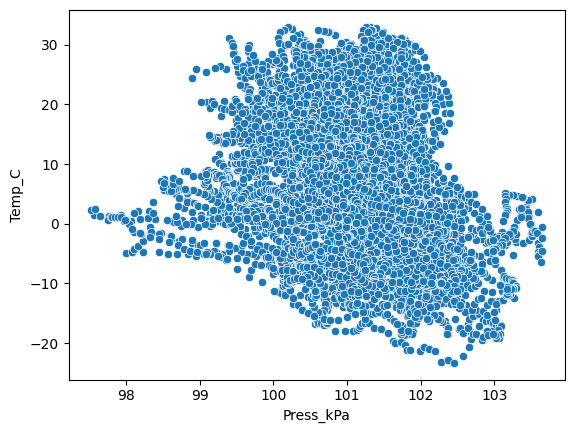

In [38]:
sns.scatterplot(y=df['Temp_C'], x=df['Press_kPa'])

<Axes: xlabel='Rel Hum_%', ylabel='Dew Point Temp_C'>

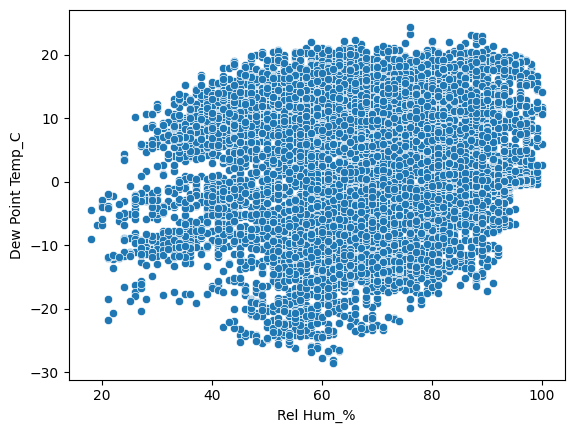

In [39]:
sns.scatterplot(y=df['Dew Point Temp_C'], x=df['Rel Hum_%'])

<Axes: xlabel='Wind Speed_km/h', ylabel='Dew Point Temp_C'>

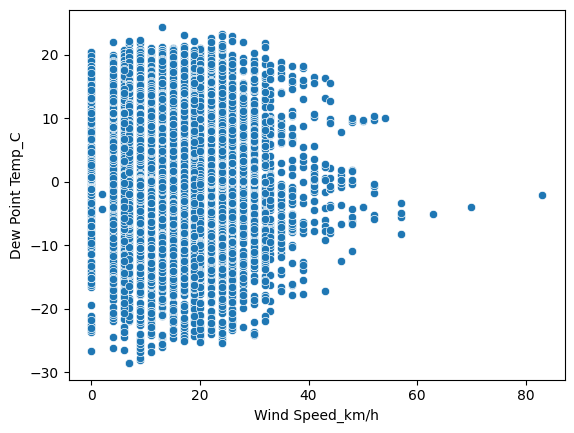

In [40]:
sns.scatterplot(y=df['Dew Point Temp_C'], x=df['Wind Speed_km/h'])

<Axes: xlabel='Visibility_km', ylabel='Dew Point Temp_C'>

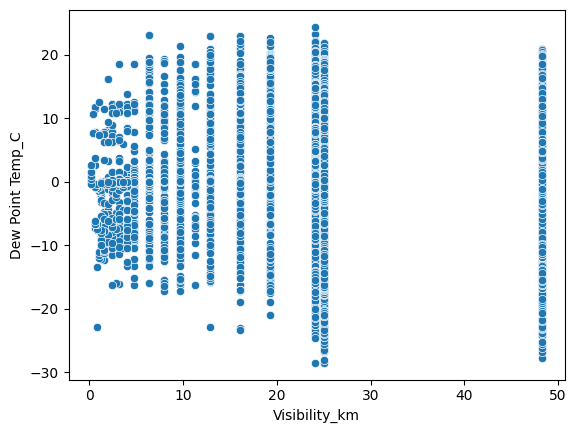

In [41]:
sns.scatterplot(y=df['Dew Point Temp_C'], x=df['Visibility_km'])

<Axes: xlabel='Press_kPa', ylabel='Dew Point Temp_C'>

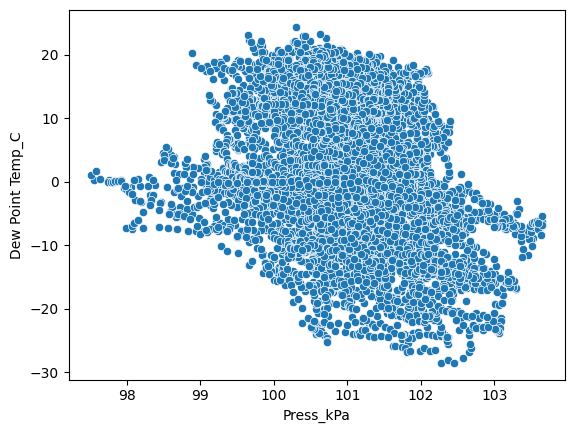

In [42]:
sns.scatterplot(y=df['Dew Point Temp_C'], x=df['Press_kPa'])

<Axes: xlabel='Wind Speed_km/h', ylabel='Rel Hum_%'>

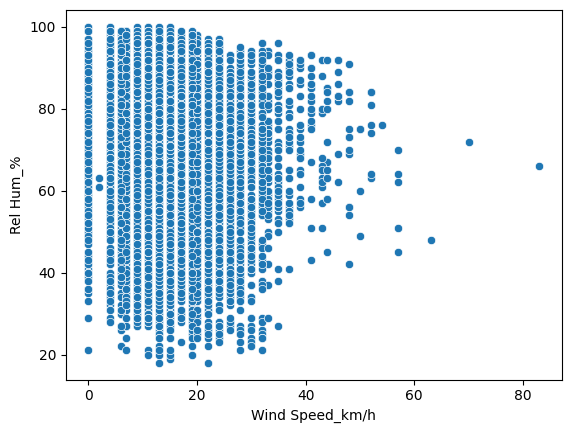

In [43]:
sns.scatterplot(y=df['Rel Hum_%'], x=df['Wind Speed_km/h'])

<Axes: xlabel='Visibility_km', ylabel='Rel Hum_%'>

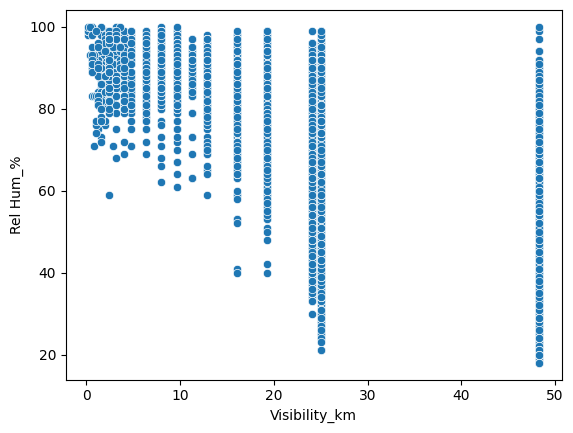

In [44]:
sns.scatterplot(y=df['Rel Hum_%'], x=df['Visibility_km'])

<Axes: xlabel='Press_kPa', ylabel='Rel Hum_%'>

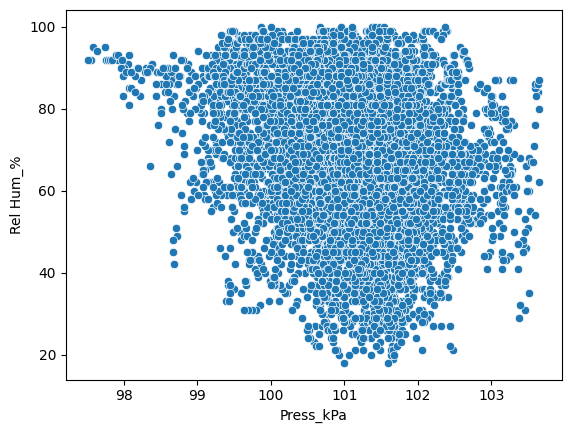

In [45]:
sns.scatterplot(y=df['Rel Hum_%'], x=df['Press_kPa'])

<Axes: xlabel='Visibility_km', ylabel='Wind Speed_km/h'>

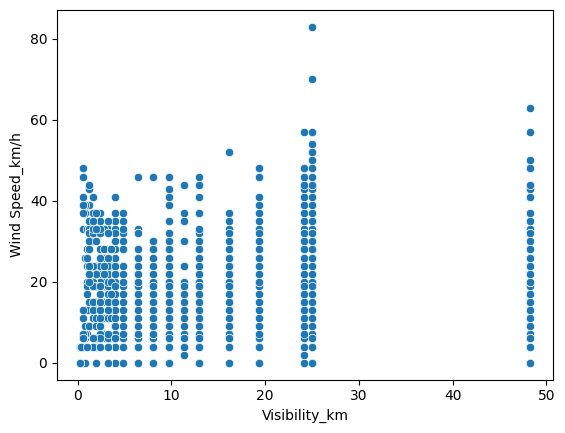

In [46]:
sns.scatterplot(y=df['Wind Speed_km/h'], x=df['Visibility_km'])

<Axes: xlabel='Press_kPa', ylabel='Wind Speed_km/h'>

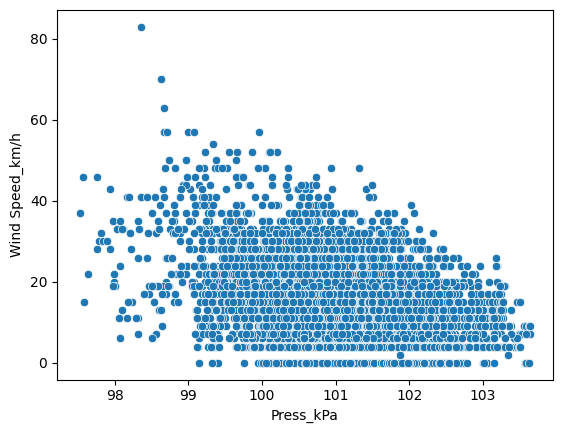

In [47]:
sns.scatterplot(y=df['Wind Speed_km/h'], x=df['Press_kPa'])

<Axes: xlabel='Press_kPa', ylabel='Visibility_km'>

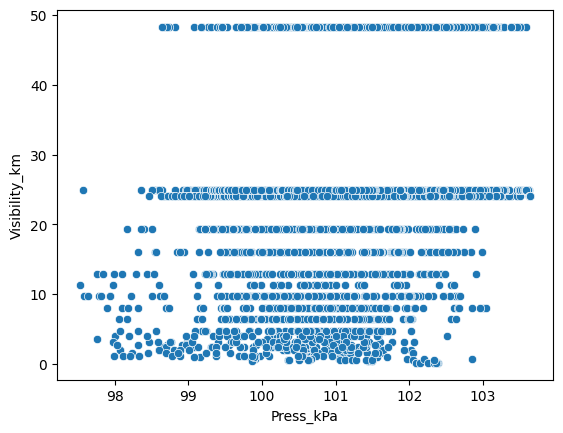

In [48]:
sns.scatterplot(y=df['Visibility_km'], x=df['Press_kPa'])

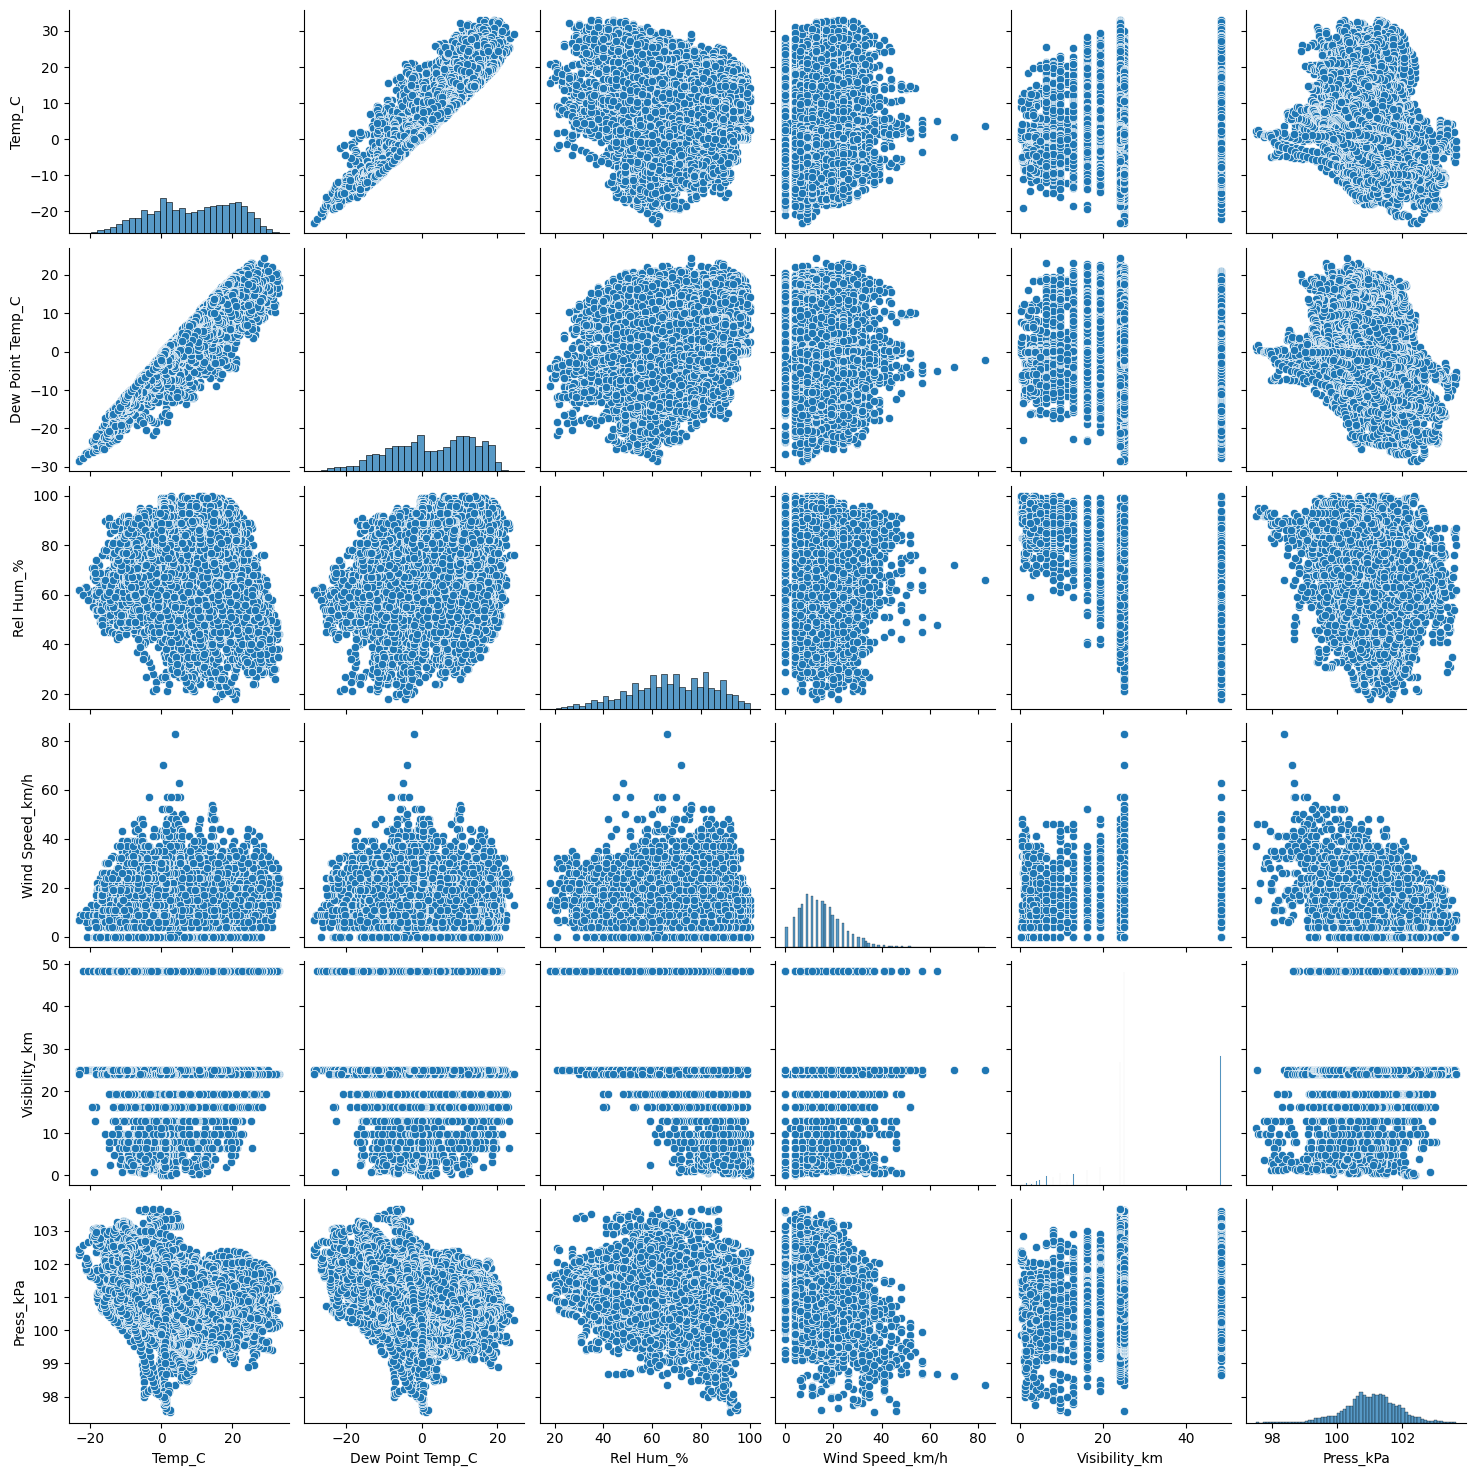

In [49]:
sns.pairplot(df)

Provided that this data is all about weather, the following might lead to the anomalies in the scatterplots above:
1. Faulty sensors that produce incorrect readings whch do not reflect exact conditions.
2. Human errors which include data entry and unit conversion mistakes.
3. Natural disasters can produce readings that are significantly different from the norm.
4. Microclimates might lead to anomalous pattrns that differ from the norm.


**Insights and Conclusions**

In [51]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.0 MB/s eta 0:00:00


In [53]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



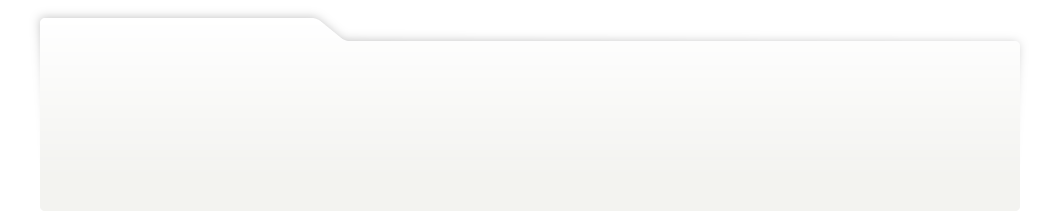
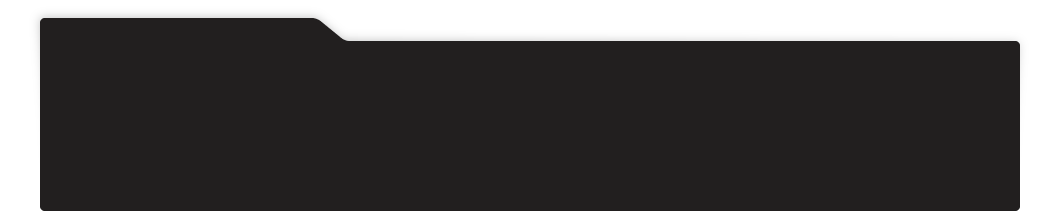
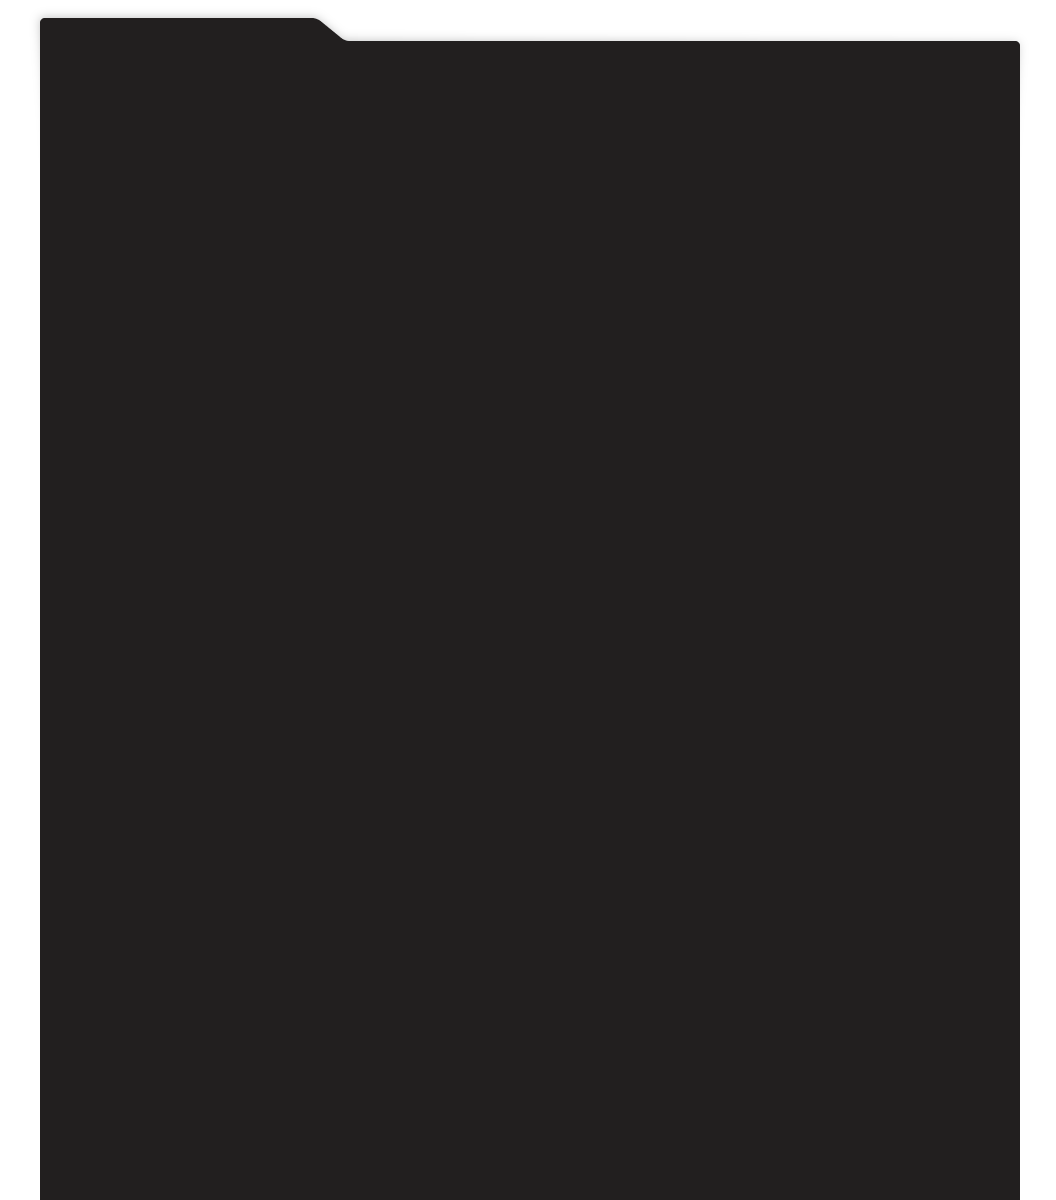
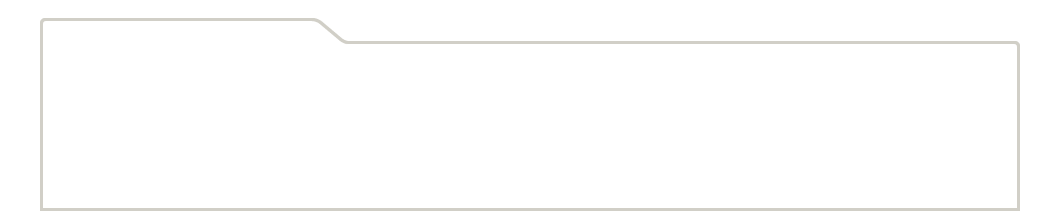
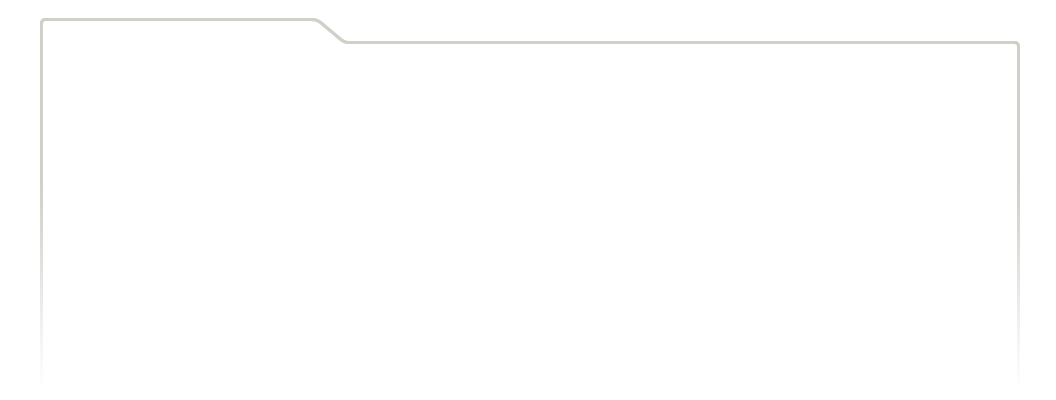
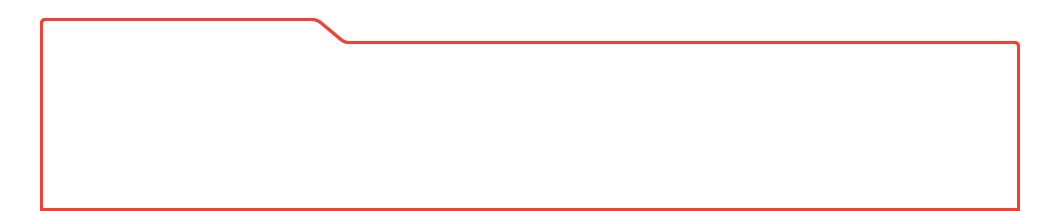
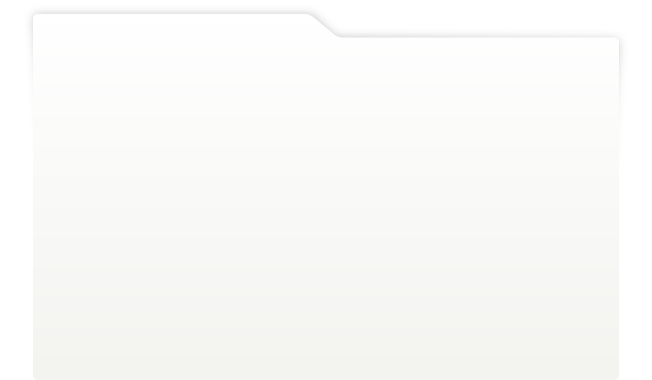
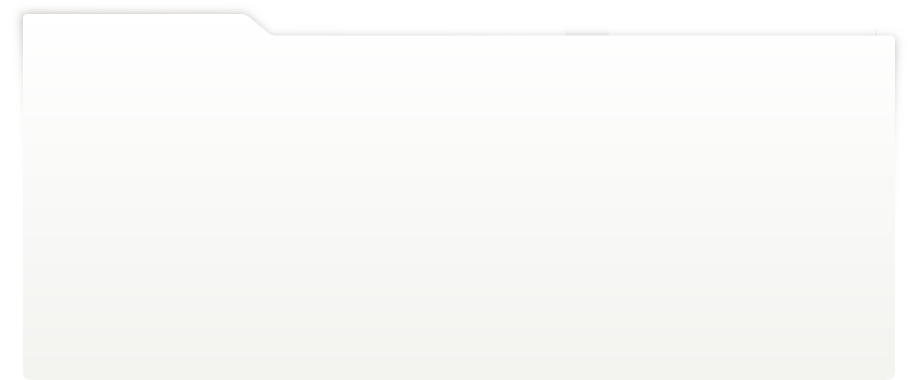
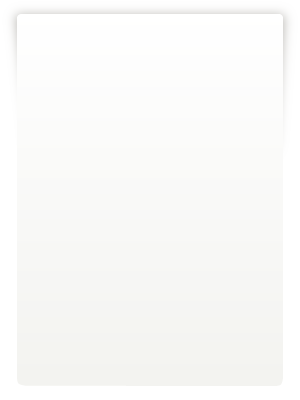
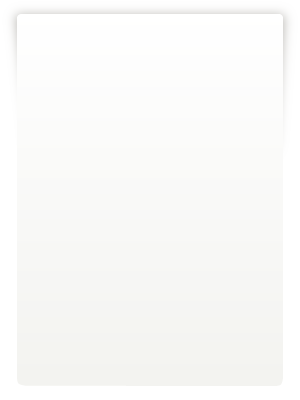
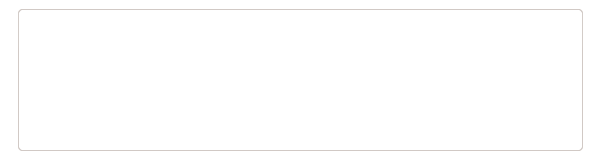
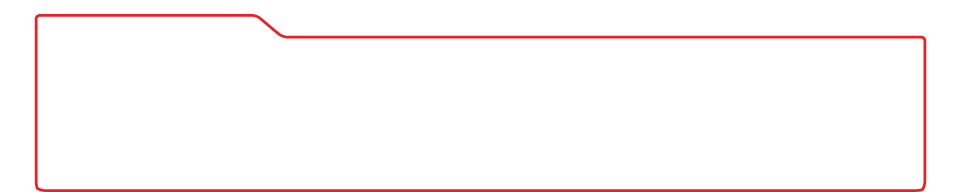
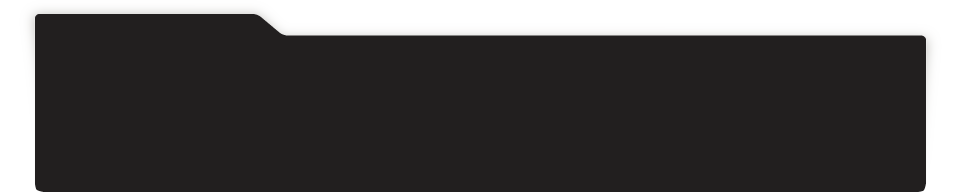
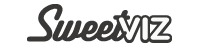
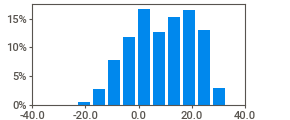
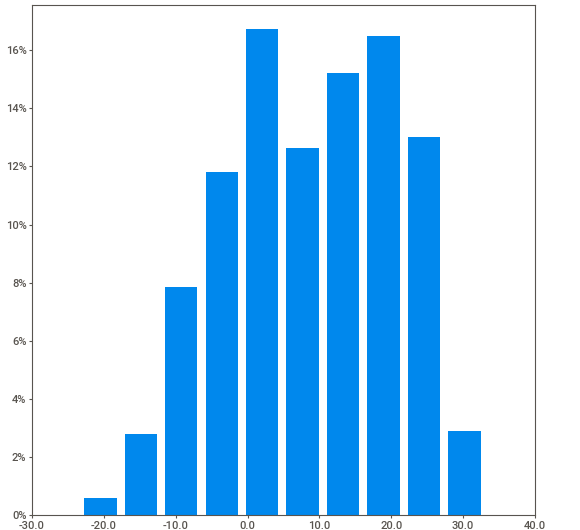
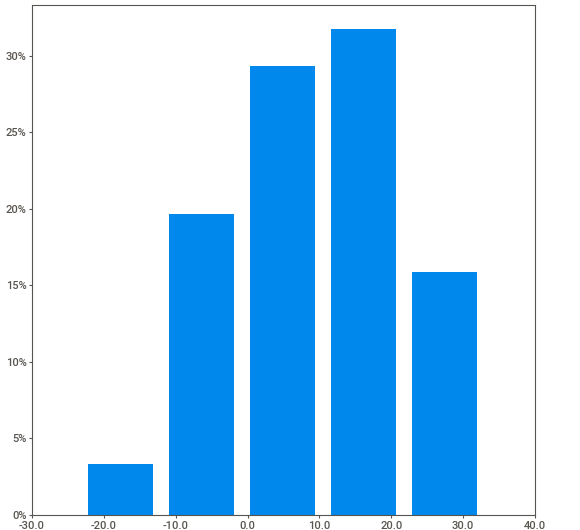
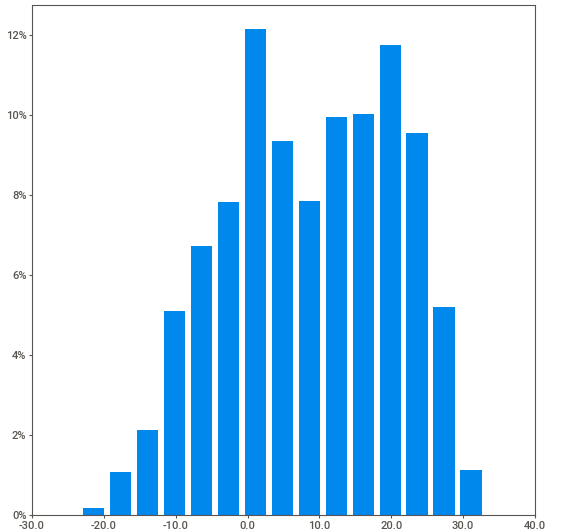
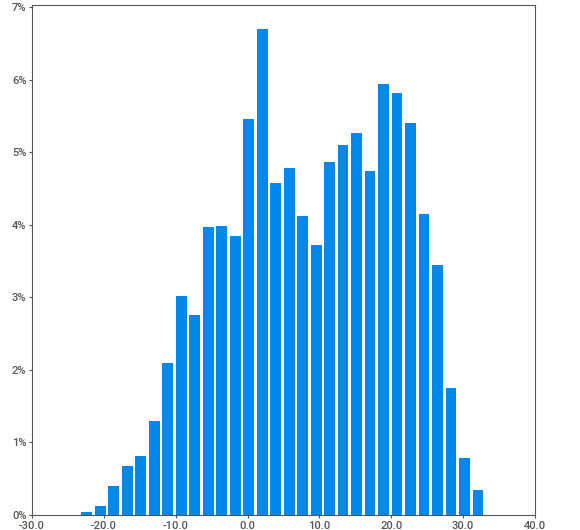
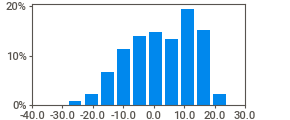
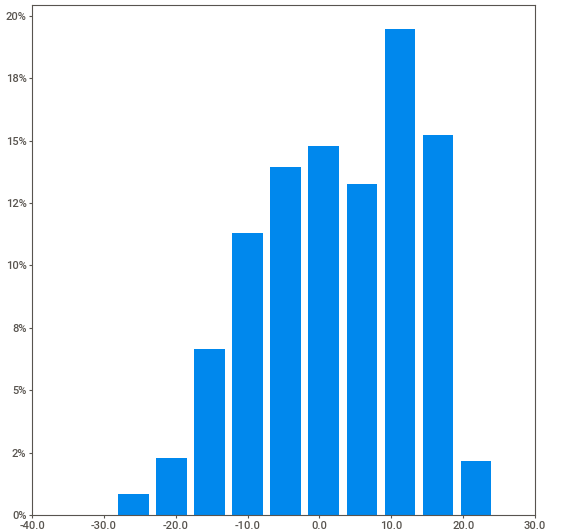
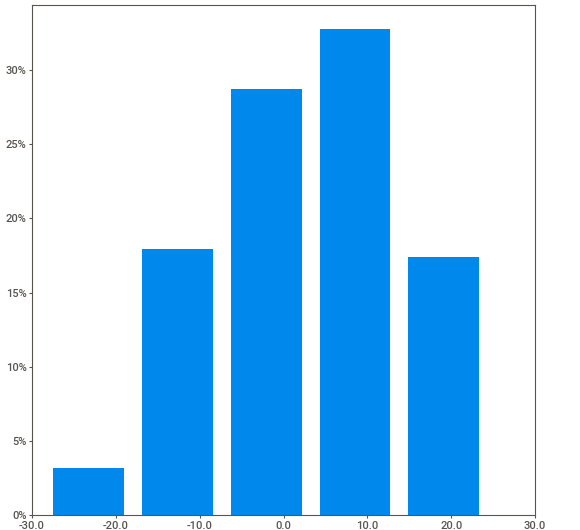
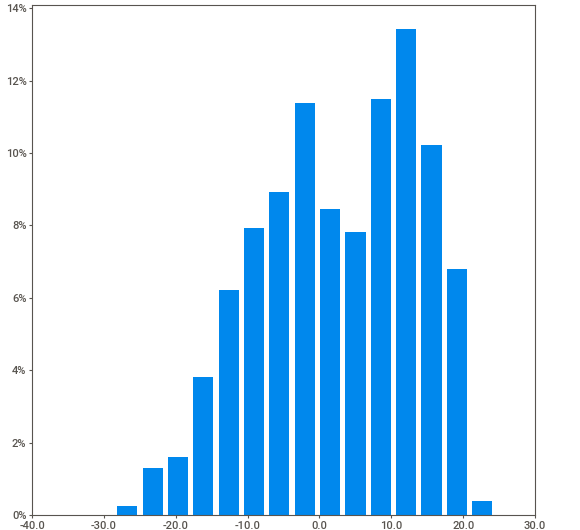
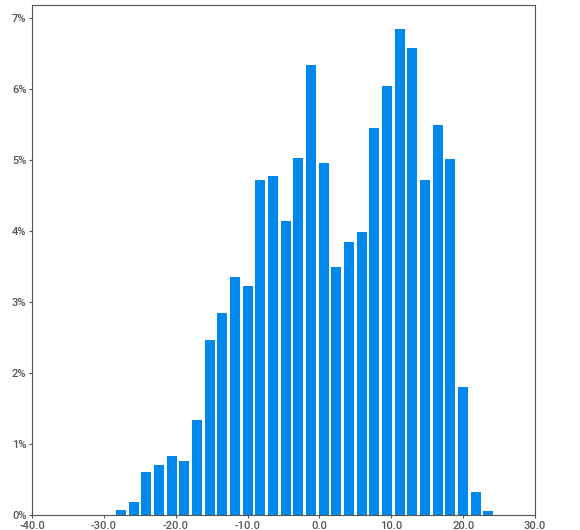
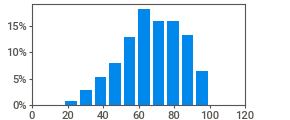
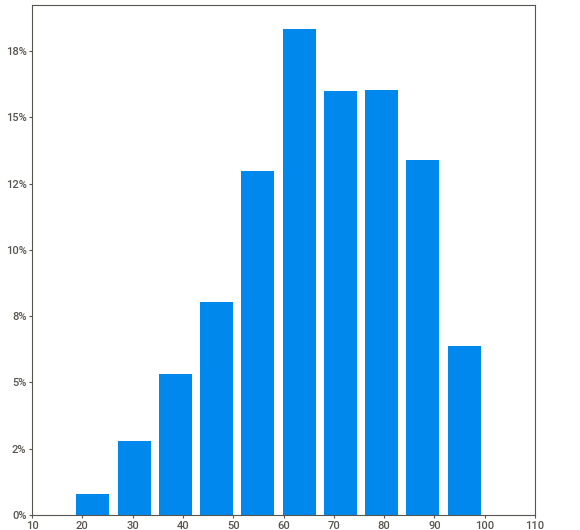
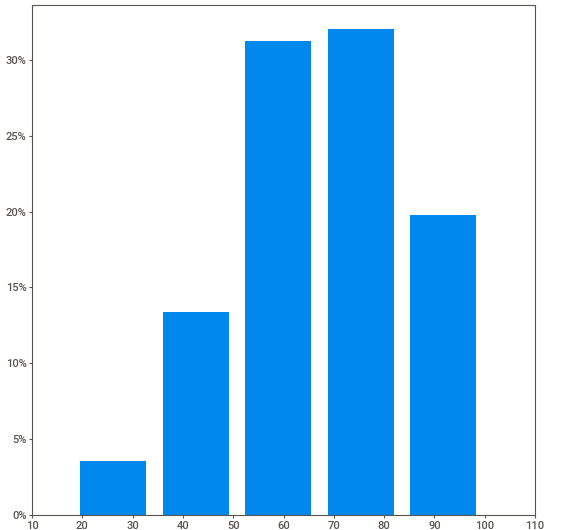
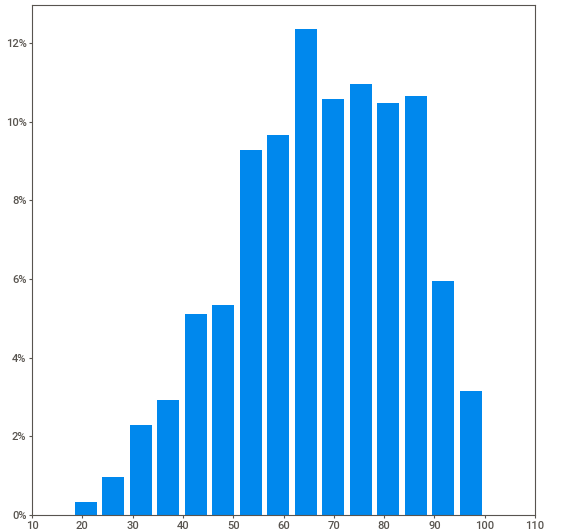
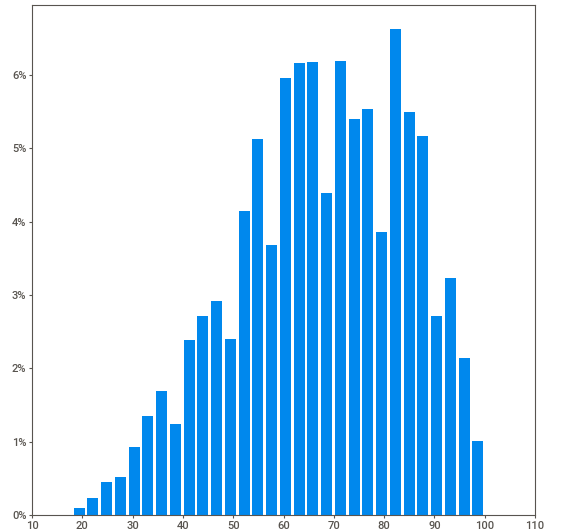
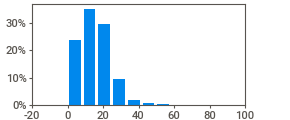
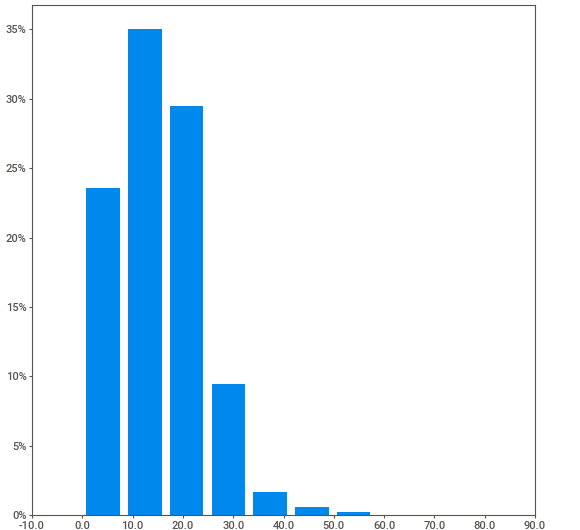
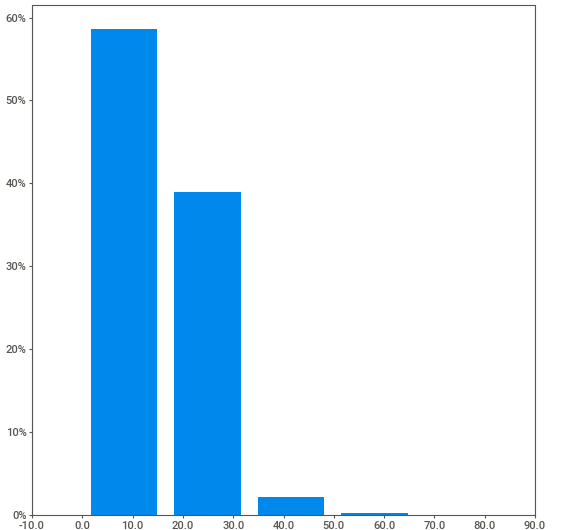
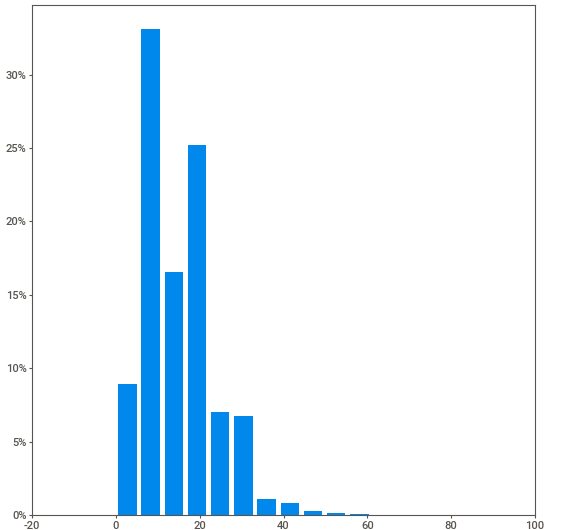
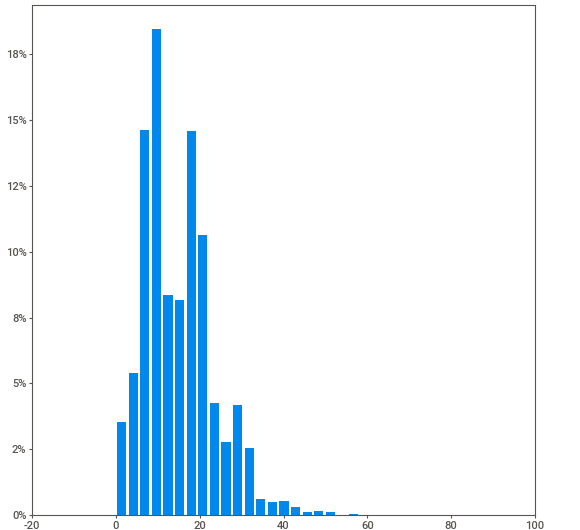
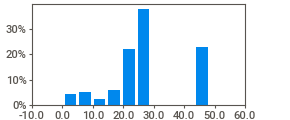
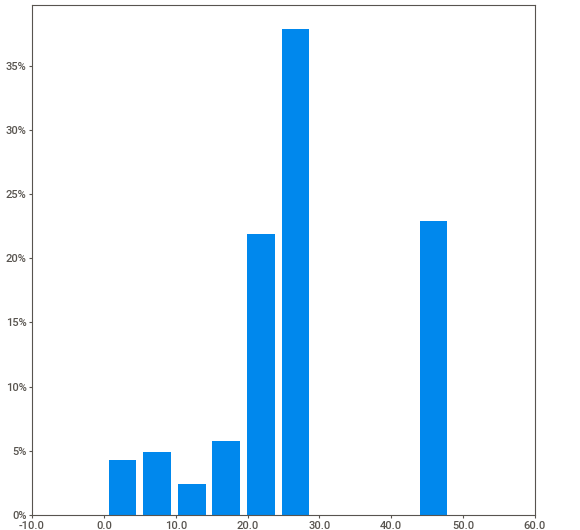
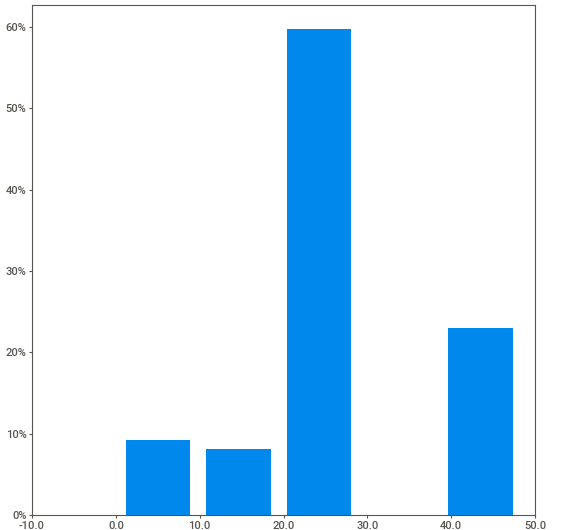
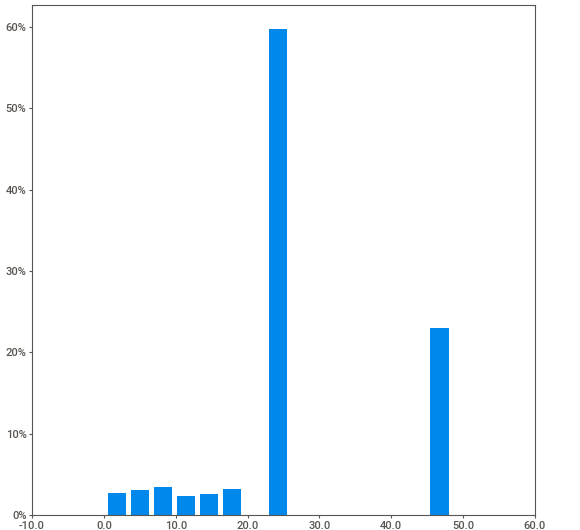
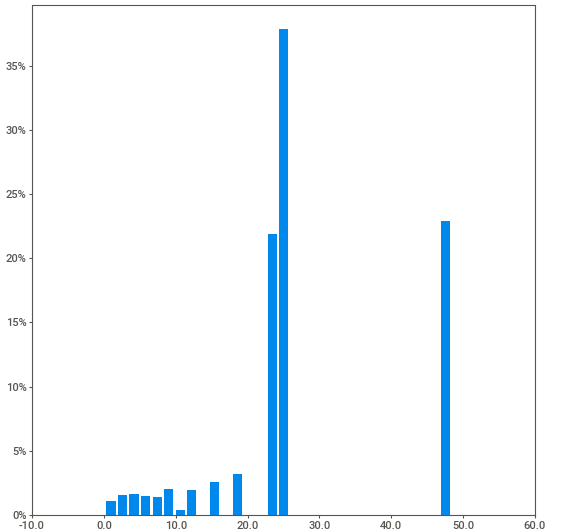
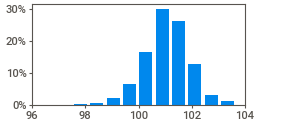
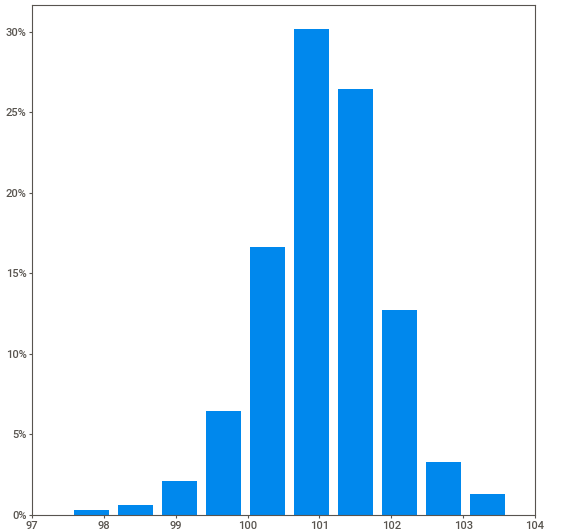
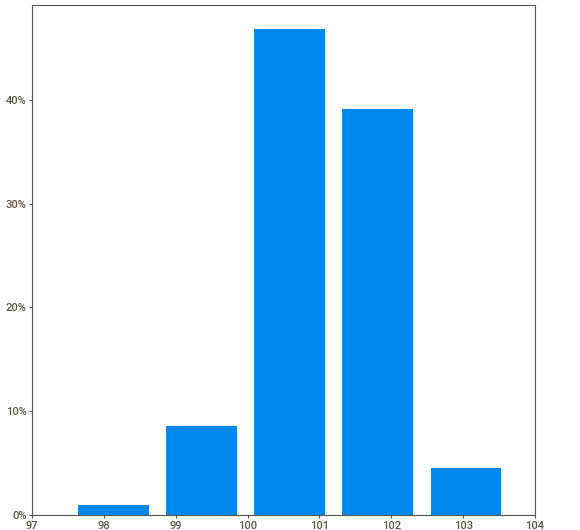
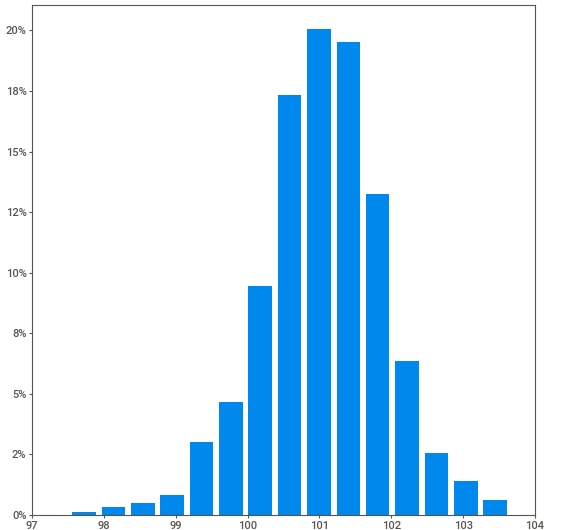
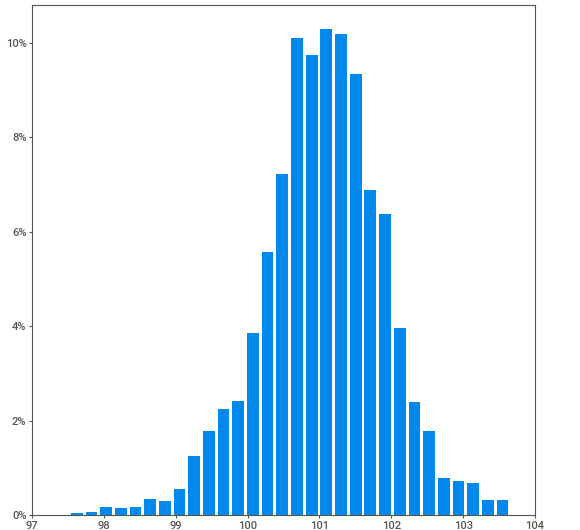
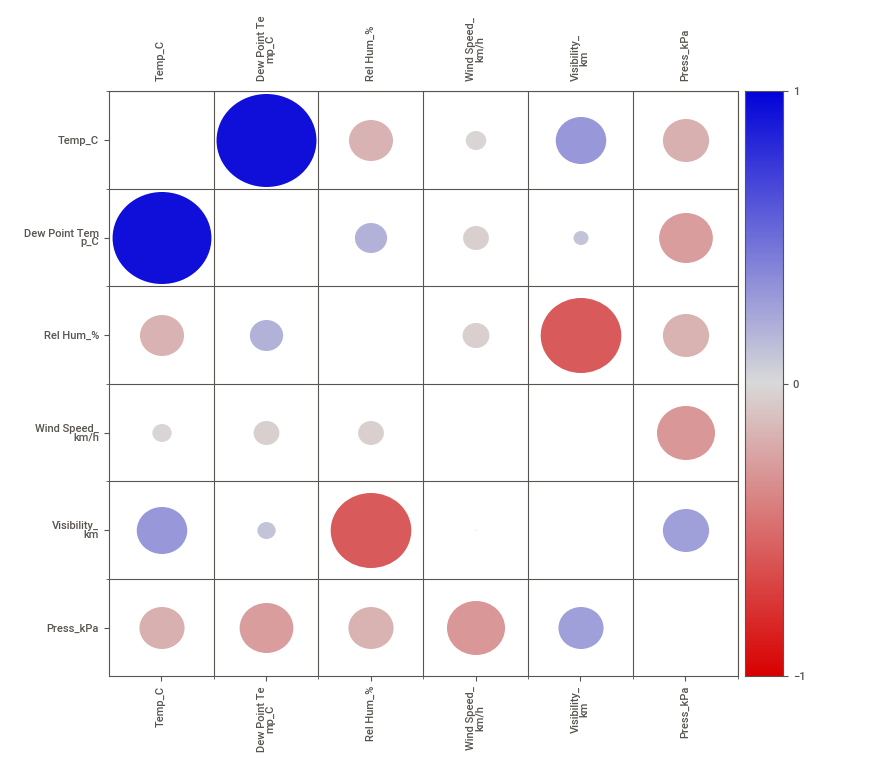
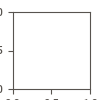

In [55]:
my_report.show_notebook()

The dataset of this Analysis is composed of weather parameters, the variables that have been analyzed incude: Temperature, Dew point Temperature, Relative humidity, Wind speed, Visibility and pressure and how they vary over time.
A negative correlation was observe between relative humidity and temperature, although there are other variables which are negatively correlated as shown in one of the heatmap in the analysis.
Also during the analysis, it was noted that the temperature is low at the start of the year and high at month 8. But then it drops back at the end of the year and the first month of the next year.
Also, there are anomalies that were discovered among some variables. Especially visibility, Wind speed and pressure(Box plots support this statement) According to my analysis, the factors that might cause the occurence of anomalies are faulty sensors, data entry errors and unit conversion errors.